# Importing D-Wave Libraries

In [31]:
import neal
import dwave_networkx as dnx
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod

import networkx as nx
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
import random as rand
import time
import numpy as np

%matplotlib inline

# Building our QUBO Problem, and QPU functions

In [43]:
def get_qubo(N,edge_nodes): # input a set of
    """Returns a dictionary representing a QUBO.
    Args:
        S(list of tuples): the coordinates of each node
    """
    
    Q = {}

    # Build QUBO 
    #Bonus for sites occupied to meet maximum condition
    
    for i in range(N):
        Q[(i,i)] = -1
 
    
    #Edge Constraints, # off diagonals
    for i in range(len(edge_nodes)):
        Q[(edge_nodes[i][0],edge_nodes[i][1])] = 3
    
    return Q

    
def run(Q, sampler, numruns = 10):
    """Runs the QUBO problem Q on the sampler provided.
    Args:
        Q(dict): a representation of a QUBO
        sampler(dimod.Sampler): a sampler that uses the QPU
    """   
    

    sample_set = sampler.sample_qubo(Q, num_reads=numruns)
    
    return sample_set



# Building our problem graph

In [44]:


# Create Nodes
nodes = [(1.19, 4.25),
(2.71, 3.48),
(1.19, 3.51),
(2, 3.38),
(1.12, 2.86),
(1.70, 2.42),
(2.36, 2.54),
(1.52, 1.48),
(2.15, 1.54),
(2.14, 1.87),
(1.72, 0.86),
(2.29, 0.87)]
edge_nodes =[]



def graphN(nodes):
    # Create empty graph
    G = nx.Graph()

    # Generate edges if they are close  within a distance of 1
    edge_nodes =[] #nodes numbers for generating objective function inside Qubo function Q
    edges = [] #coordinates for graph
    for i in range(len(nodes)-1):
        for j in range(i+1,len(nodes)):
            xi = nodes[i][0]
            xj = nodes[j][0]
            yi = nodes[i][1]
            yj = nodes[j][1]
            dij = ((xi-xj)**2 +(yi-yj)**2)**(1/2)
            if dij <= 1:
                edge =(nodes[i],nodes[j])
                edge_indices = (i,j)
                edge_nodes.append(edge_indices)
                edges.append(edge)

    G.add_edges_from(edges)
    return G, edge_nodes, edges

G, edge_nodes,edges = graphN(nodes)

# Running problem on Dwave qpu

In [14]:
Q = get_qubo(len(nodes),edge_nodes)

#Set Sampler             
sampler = EmbeddingComposite(DWaveSampler(profile='CDL'))

sample_set = run(Q, sampler)
    
print(sample_set)    

   0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc. chain_.
0  1  0  0  1  1  0  0  0  0  1  0  1   -5.0       2     0.0
1  1  1  0  0  1  0  1  1  0  0  0  0   -5.0       3     0.0
2  1  1  0  0  1  0  1  0  0  0  0  1   -5.0       1     0.0
3  1  1  0  0  1  0  1  0  1  0  0  0   -5.0       2     0.0
4  1  0  0  1  0  1  0  0  0  0  0  1   -4.0       1     0.0
5  1  1  0  0  1  0  0  0  0  0  0  1   -4.0       1     0.0
['BINARY', 6 rows, 10 samples, 12 variables]


In [15]:
sample = list(sample_set.record[0][0])

print('Maximum independent set found is' ,sample)

Maximum independent set found is [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]


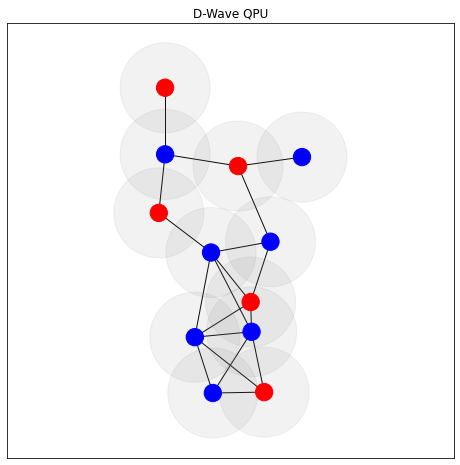

In [151]:
# Visualize the results

G, edge_nodes,edges = graphN(nodes)

def graph_visualize(sample,nodes,G,title):
    fig, ax = plt.subplots(figsize=(8,8))
    sample_nodes = []
    for i in range(len(sample)):
        if sample[i] == 1:
            sample_nodes.append(nodes[i])   
    notsample = list(set(G.nodes()) - set(sample_nodes))
    color_map = []
    for node in sample:
        if node ==1:
            color_map.append('red')
        else: 
            color_map.append('blue')     

    original_name = "antenna_plot_original.png"
    pos ={}
    for i in range(len(nodes)): # add positions
        pos[nodes[i]]=nodes[i]
    
    for x,y in nodes:   ## add radius
        circle = plt.Circle((x,y), 0.5, color='gray', alpha=0.1)
        ax.add_patch(circle)
        
  
    ax.set_title(title)
    nx.draw_networkx(G, pos,node_color=color_map,with_labels=False)
    ax.axis('equal')
    #plt.savefig(original_name, bbox_inches='tight')
    #plt.show()
    return

graph_visualize(sample,nodes,G,'D-Wave QPU')


# Simulated Annealing

In [45]:
Q = get_qubo(len(nodes),edge_nodes)

#Set Sampler             
sampler = neal.SimulatedAnnealingSampler()
sample_set = run(Q, sampler,numruns = 2000)
    
print(sample_set)    

      0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc.
0     1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
1     1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
2     1  1  0  0  1  0  0  0  0  1  0  1   -5.0       1
3     1  1  0  0  1  0  1  0  1  0  0  0   -5.0       1
4     1  1  0  0  1  0  1  0  0  0  1  0   -5.0       1
5     1  1  0  0  1  0  1  0  0  0  0  1   -5.0       1
6     1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
7     1  1  0  0  1  0  1  1  0  0  0  0   -5.0       1
8     1  1  0  0  1  0  1  0  1  0  0  0   -5.0       1
9     1  1  0  0  1  0  1  0  1  0  0  0   -5.0       1
10    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
11    1  1  0  0  1  0  1  0  1  0  0  0   -5.0       1
12    1  1  0  0  1  0  0  0  0  1  1  0   -5.0       1
13    1  0  0  1  1  0  0  0  0  1  1  0   -5.0       1
14    1  1  0  0  1  0  0  0  0  1  0  1   -5.0       1
15    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
16    1  1  0  0  1  0  1  0  1  0  0  0   -5.0 

In [142]:
sample = list(sample_set.record[0][0])
E_best = list(sample_set.record[0])[1]
print(E_best)
print(sample)
print(nodes)

-5.0
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
[(1.19, 4.25), (2.71, 3.48), (1.19, 3.51), (2, 3.38), (1.12, 2.86), (1.7, 2.42), (2.36, 2.54), (1.52, 1.48), (2.15, 1.54), (2.14, 1.87), (1.72, 0.86), (2.29, 0.87)]


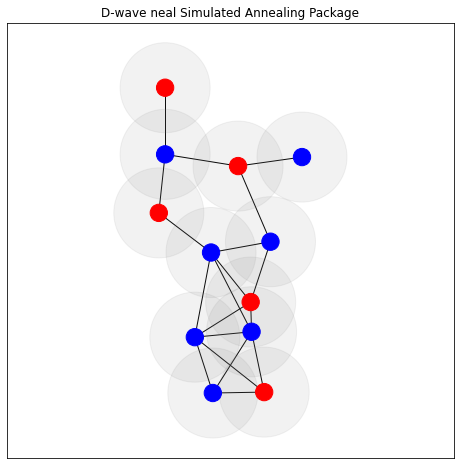

In [149]:
# Visualize the results
graph_visualize(sample,nodes,G,'D-wave neal Simulated Annealing Package')

# Generating best Calculation time vs number of nodes in the graph and computation time


In [144]:
# Generate calculation time and best energy for each N
N = 40
num_runs = 20

def time_benchmark_vs_N(N,num_runs):
    
    # Generating N
    Ns=[]
    Es = []
    del_times = []

    def gen_node(N):    
   
        rng = N/4
        nodes = []
        for i in range(N):
            pcoord = (rand.uniform(1,rng),rand.uniform(1,rng))
            nodes.append(pcoord)

        return nodes    
    
    
    def dwave_anneal(N,num_runs):
            start = time.time()   
            nodes = gen_node(N)   # output node coords
            G, edge_nodes,edges = graphN(nodes)   # create problem graph for N

            #Generate qubo
            Q = get_qubo(len(nodes),edge_nodes)

            #Set Sampler             
            sampler = neal.SimulatedAnnealingSampler()
            sample_set = run(Q, sampler,num_runs)
            sample = list(sample_set.record[0][0])
            E_best = list(sample_set.record[0])[1]
            Es.append(E_best)

            end = time.time()                               #end---------------

            del_t = end  - start
            return del_t, E_best
        
    #Loop over N's
    for i in range(1,N+1):
                                  #start------------
        Ns.append(i)
        
        
        del_t, E_best = dwave_anneal(i,num_runs)
        del_times.append(del_t)
    return Ns,Es,del_times

Ns,Es,del_times = time_benchmark_vs_N(N,num_runs)

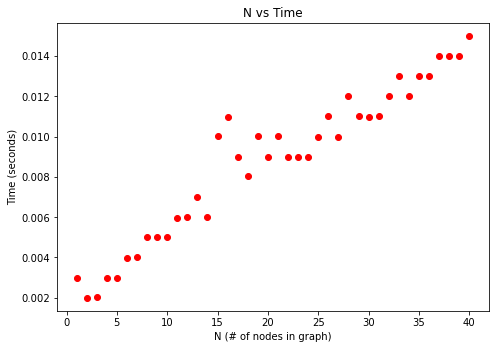

In [145]:
#Generate Graph
def plot_time_benchmark(Es,Ns,del_times):
    

    calc_times = del_times
    Ns = Ns
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(Ns, del_times, color='r')
    #m, b = np.polyfit(Ns, del_times, 1)     #bestfit
    #plt.plot(Ns, m*Ns+b)
    
    #ax.scatter(grades_range, boys_grades, color='b')     other plots
    ax.set_xlabel('N (# of nodes in graph)')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('N vs Time')
    #plt.legend()
    plt.show()
    return

plot_time_benchmark(Es,Ns,del_times)

# To do
    - set to proper coordinates
    - draw circles
    - put in anneal schedule
    - benchmark run time
    - generate arbitrary larger graph
    - hybrid solver

In [ ]:
# Setting tuples as correct coordinates


pos={'0':(1,0),'1':(1,1),'2':(2,3),'3':(3,2),'4':(0.76,1.80),'5':(0,2)}    
nx.set_node_attributes(G, pos, 'coord')

In [ ]:
https://support.dwavesys.com/hc/en-us/community/posts/360050243474-anneal-schedule-details